# **BSCI238F Final Project**

##**Final Project is now due: Monday, 12/13 at 11:59 PM**

Your final project for this course will focus on practicing the principles of data science, in a neuroscience context.

**Given a neural dataset, your task will be to organize it, explore its properties/features and create a class and methods to analyze it.**

Here are the 5 key principles of data science we talked about in class:

1. Keep tidy, clean, and well-organized data
2. Take time to explore/familiarize yourself with the dataset and its trends
3. Use this/prior knowledge to create clear and focused end goals
4. Use the data science pipeline and iterate through it repeatedly to keep 5. improving your analyses and models
5. Communicate, communicate, communicate!!

Also, check out this article on data science and journalism (communication!) from [FiveThirtyEight](https://fivethirtyeight.com/features/what-the-fox-knows/ ), and [these slides from CMSC320 at UMD introducing how to do data science with Python](https://cmsc320.github.io/lecs/cmsc320_f2021_lec02.pdf) (and a little R).

**This project will require use of Matplotlib and potentially NumPy as well. Feel free to import other packages to use and play with (SciPy?)**

In [43]:

import math

lum_vals = [-1, 0, 1]
neuron_filter = np.array([0, 0, -1, -1, 1, 1, -1, -1, 0, 0])
pos = 10

def random_stim(frames, pos, lum_vals):
    return np.random.choice(lum_vals, (frames, pos))

def generate_drifting_grating_stim(stim_frames, pos, sp_freq = None, temp_freq = None, sp_period = None, temp_period = None, to_plot = True):
    """ Generate a drifting grating stimuli at the desired spatial and temporal frequencies
    
        Args:
            stim_frames: stimulus frames needed
            pos: number of spatial positions
            sp_freq (float): spatial frequency in terms of cycles per pixel (optional)
            temp_freq (float): temporal frequency in terms cycles per stim_frame (optional)
            sp_period (pixels): number of pixels in one cycle over space (optional)
            temp_period (frames): number of frames in one cycle over time (optional)
            
    """
    
    # sin(wt(t) + wx(x)) units be pixels and frame
    
    if sp_freq == 0 or sp_period == 0:
        new_sp_freq = 0
    elif sp_freq is not None:
        sp_pixels_period = 1/sp_freq
        new_sp_freq = (2 * math.pi)/sp_pixels_period
    else:
        new_sp_freq = (2 * math.pi)/sp_period
        
    if temp_freq == 0 or temp_period == 0:
        new_temp_freq = 0
    elif temp_freq is not None:
        if temp_freq == 0:
            new_temp_freq = 0
        else:
            temp_pixels_period = 1/temp_freq
            new_temp_freq = (2 * math.pi)/temp_pixels_period
    else:
        new_temp_freq = (2 * math.pi)/temp_period
    
    dg_stim = np.zeros((stim_frames, pos))    
    for t in range(stim_frames):
        for x in range(pos):
            dg_stim[t, x] = np.sin((new_sp_freq * x) + (new_temp_freq * t))
    
    if to_plot:
        plt.figure()
        plt.imshow(dg_stim[:100].T, cmap = 'gray')
        plt.show()
        
    return dg_stim

dg_stim = generate_drifting_grating_stim(100, pos, sp_freq = 0.1, temp_freq = 0.1, to_plot = False)
rand_dot = random_stim(100, 10, lum_vals)
stimuli = np.concatenate((dg_stim, rand_dot), axis = 0)
stimuli_identity = np.concatenate((np.ones((100, 1)), np.zeros((100, 1))), axis = 0)

for i in range(49): 

  dg_stim = generate_drifting_grating_stim(100, pos, sp_freq = 0.1, temp_freq = 0.1, to_plot = False)
  rand_dot = random_stim(100, 10, lum_vals)
  stimuli = np.concatenate((stimuli, dg_stim, rand_dot), axis = 0)
  stimuli_identity = np.concatenate((stimuli_identity, np.ones((100, 1)), np.zeros((100, 1))), axis = 0)
  
gf = stimuli@np.expand_dims(neuron_filter, axis = 1)
gf[gf < 0] = 0
recordings = np.zeros((10000, 1))

for i in range(gf.shape[0]):
  recordings[i] = np.random.poisson(gf[i], 1)[0]


In [44]:
import matplotlib.pyplot as plt
import numpy as np

## ***Each question in this notebook will indicate whether you should respond in a code cell, text cell, or both***

## **Generating the Neural Dataset**

The hidden cell below generates a dataset consisting of three NumPy arrays; you do not HAVE to use NumPy - these is an easy way to convert NumPy arrays to Python lists - but it will be much more efficient to learn some NumPy ;)

1. `stimuli`: The first array represents the one-dimensional visual stimulus presented to a subject (e.g., a primate) at each time frame. The stimuli in this case consists of alternating random dot and drifting grating stimuli. It has two dimensions - the first represents the time frame, and the second represents the spatial dimension (10 positions).

2. `stimuli_identity`: The second one-dimensional array contains just 0's and 1's that represent the stimulus identity, or type, at a specific frame: 0 is a random dot stimuli, while 1 is a drifting grating stimuli.

3. `recordings`: The third and final array represents the number of action potentials/spikes recorded during the time period of each frame. The number of action potentials typically ranges from 0 to 10 per time bin/frame, but can sometimes be more. **Think: can it be non-negative at any point?**

Each time frame or "bin" **encompasses 0.01 seconds or 10 milliseconds.**

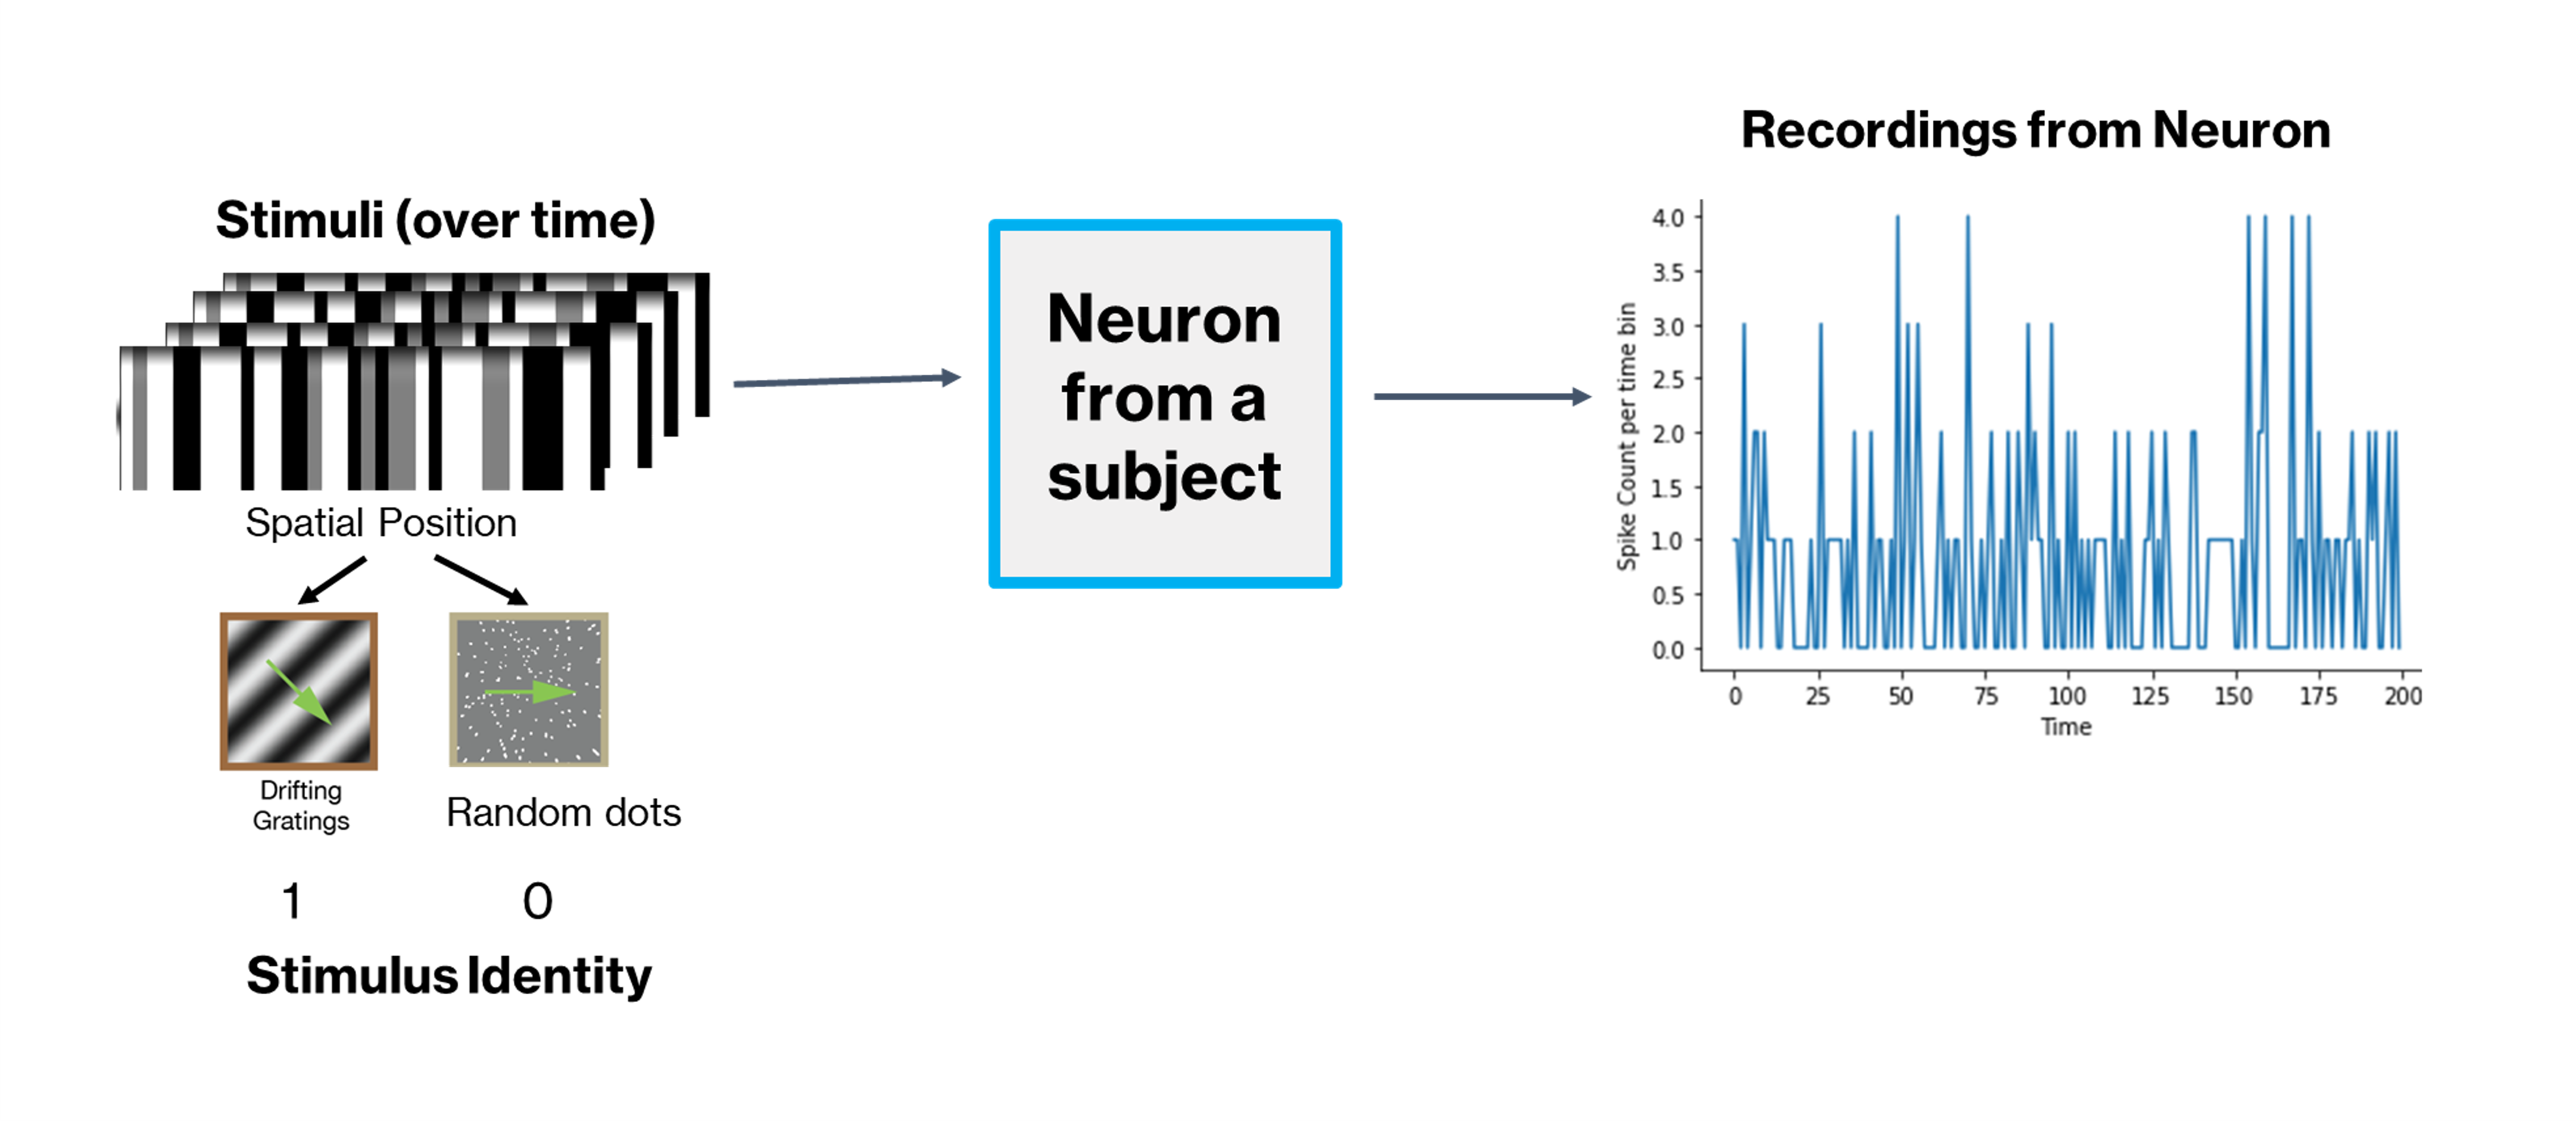

##**Sanity-check #1 (2 points)**

Print the shapes of all three arrays and explain what they mean in the context of the neural experiments - are they what you expected given the information above? (code and text box, 2 pts)

In [45]:
print(stimuli.shape)
print(stimuli_identity.shape)
print(recordings.shape)  


(10000, 10)
(10000, 1)
(10000, 1)


The shape of all the three arrays make sense because for stimuli, there are only 10 positions so it makes sense that the seocnd number goes to 10, which the amount of spatial dimenstions. Stimuli Identity makes sense since it can be represented by either 0 or 1, which correlate to different stimuluses. The recordings make sense because the number of APs cannot ever be negative


## **Exploring the Dataset (15 points)**

Even though these arrays are already pretty tidy, there are still a few conditions you need to check as you explore this dataset.

1. Can you ever have a negative number of action potentials/spikes in a bin? Confirm your guess/belief by checking the `recordings` array for negative values. (code and text box, 3 pts)

2. What is the minimum, maximum, range, and mean of the spiking responses in spikes per second, given that each time frame or "bin" encompasses 0.01 seconds or 10 milliseconds? Does this seem reasonable to you (do some quick background research)? (code and text box, 3 pts)

3. How is the random dot stimuli represented? What are the values/spatial position each pixel can take on (actual value in the array)? (code and text box, 3 pts)

4. Your friend Felix does not believe that your stimuli is drifting/moving properly ~ find a stretch of drifting grating stimuli and plot it with `plt.imshow()` and the color scheme set to 'gray' - see examples below. Communicate: tell us why we see what we see with code comments and/or a text cell. The figure will be very long/rectangular and look a bit small by default - please enlarge it. (code and text box, 3 pts)

5. Show how the stimulus identity alternates in the first 200 time frames by plotting `stimuli` with `plt.imshow()`. (code only, 3 pts)


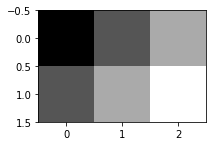

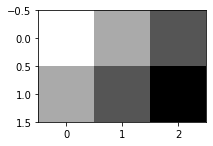

In [29]:
# Sample plt.imshow() plots with both Python lists and NumPy arrays (note how you can change the figure size in plt.figure()!)

plt.figure(figsize = (3, 3))

plt.imshow([[1, 2,3], [2, 3, 4]], cmap = 'gray')

plt.figure(figsize = (3, 3))

plt.imshow(np.array([[-1, -2,-3], [-2, -3, -4]]), cmap = 'gray')

plt.show()

In [30]:
##1

##A negative amount of action potential can occur. This is because APs do no go back in the negative direction in addition that there cannot be a 
##negative amount of a physical quantity, and there would be no negative values in the recording arrays






In [31]:
##2
print("Max (per seconds): " + str(recordings.max() * 100))
print ("Min (per seconds): " + str(recordings.min() * 100))
print ("Mean (per seconds): " + str(recordings.mean() * 100))
print ("Range (per seconds): " + str((recordings.max() - recordings.min()) * 100))




Max (per seconds): 1000.0
Min (per seconds): 0.0
Mean (per seconds): 51.980000000000004
Range (per seconds): 1000.0


This does seem reseaonable to me, according to the research.

In [32]:
#3

##The random stimuli is represented by 0 in the array, and the spatial position/value is represented by 0,1,-1 in the arrays
print (np.any(stimuli_identity[300:350] == 1))
print(stimuli[300:350])



False
[[ 0.  0. -1.  1.  1.  1.  0.  0.  0.  1.]
 [ 0.  0. -1.  1.  0.  1.  1.  0.  1.  1.]
 [ 0.  0.  1. -1.  0.  1.  1. -1.  1.  0.]
 [-1.  0.  1.  1.  1. -1. -1.  0.  0.  1.]
 [-1.  0.  0.  1.  0. -1. -1.  1.  1. -1.]
 [ 1. -1.  0.  0.  1. -1.  0. -1.  1.  1.]
 [ 0. -1.  1.  0.  1.  1.  1.  0.  1.  0.]
 [ 0.  1.  1. -1.  1.  0.  0. -1.  1.  1.]
 [ 0.  1.  1.  0.  1. -1.  1. -1.  0. -1.]
 [ 1.  0. -1.  1.  0.  1.  1.  0.  0. -1.]
 [ 1.  1.  1. -1.  1.  0.  0.  0. -1.  0.]
 [-1.  1. -1. -1. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  1. -1.  1.]
 [ 0. -1.  1.  0.  0. -1.  1.  0. -1.  1.]
 [ 1.  1. -1. -1.  0. -1.  1. -1. -1. -1.]
 [-1.  0. -1. -1.  0.  0.  0.  0.  1.  0.]
 [ 0. -1.  1. -1.  1. -1. -1. -1. -1.  0.]
 [ 0.  0.  1. -1. -1.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  1. -1.  1.]
 [ 0. -1.  1. -1.  0. -1. -1.  1.  1. -1.]
 [-1.  0. -1.  0. -1.  0. -1.  1.  1.  1.]
 [ 0.  1. -1.  0. -1.  0.  0. -1. -1.  0.]
 [-1.  1.  0. -1. -1.  1. -1. -1.  0.  0.]
 [ 0.

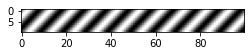

In [33]:
#4
## its because there is a drifting gratings stimulus that is occuring and no random dots stimulus occuring, which gives us the striped plot

drifting_gratings_stretch = stimuli[0:100]

plt.figure (figsize = ( 4, 6))
plt.imshow (drifting_gratings_stretch.T, cmap = 'gray')
plt.show ()





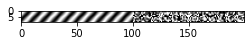

In [34]:
drifting_gratings_stretch = stimuli[0:200]

plt.figure (figsize = ( 4, 6))
plt.imshow (drifting_gratings_stretch.T, cmap = 'gray')
plt.show ()



## **Hypothesis-Driven Questions (13 points)**

Now that you are familiar with the dataset, please use both code and text explanations to answer the research questions below.

We know that the neurons preferentially fire when they detect stimuli they "like".

1. Does this neuron prefer the drifting bar stimuli or the random bar stimuli? Pick a metric to compare the neuron's respective preferences towards these two stimuli conditions and justify it. (code and text cell, 5 pts)

2. What is this neuron's "favorite" stimuli - i.e., what is the stimuli it responds the most to? There's a few ways to do this - a more complex option involves taking an average of all stimulus frames, weighed by the number of spikes during that frame (more spikes == more like!). Justify why you chose your way. (code and text cell, 5 pts)

3. I have plotted the neuron's "true" favorite stimulus below ~ how does your answer from #2 compare? (text cell only, 3 pts)

In [35]:
#1
## I believe that the neuron prefers the random dot stimulus because of the higher mean APs  per time as opposed to the drifting stimulus.
print (np.mean(recordings[np.where(stimuli_identity == 0)[0]]))
print (np.mean(recordings[np.where(stimuli_identity == 1)[0]]))




0.8076
0.232


In [36]:
#2
##The random dot stimulus is the favorite
driftinggradient = np.where(stimuli_identity == 1)
randomdot = np.where(stimuli_identity == 0)

max_DG = np.max(recordings[driftinggradient])
max_RD = np.max(recordings[randomdot])


print(max_RD)
print (np.max(max_DG))




10.0
4.0


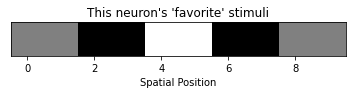

[ 0  0 -1 -1  1  1 -1 -1  0  0]


In [37]:
plt.imshow(np.expand_dims(neuron_filter, axis = 1).T, cmap = 'gray')

plt.title("This neuron's 'favorite' stimuli")
plt.yticks([])
plt.xlabel("Spatial Position")
plt.show()
print(neuron_filter)

In [38]:
#3
## The plot of the random dot stimuli is similar to the plot that was given so it confirms my answer for number 2 



## **Creating an `analyze_neural_data` class**

Now imagine you have recording data for many neurons responding to this same stimuli or maybe a different stimuli set). It would be helpful to have a set of methods to repeat some of the analyses you did above. 

Create a class called `analyze_neural_data` that is initiated with the three arrays as instance variables of the class, and contains the following methods. **Sample output for these functions will be shown in a recorded video during a Zoom session on 11/23 at 5 PM.**

*  `plot_stim_frame(frame_num)` - plot a single stimuli frame as a line plot with the x-axis as spatial position, and y-axis as the "pixel value" of the stimulus. Return nothing.
*   `get_resp_range()` - just return the range of the response values (spikes per time frame) as a `int`: for this neuron it is **around 12 spikes per time bin (not second!)**.
*   `get_resp_means()`-  perform the analysis from Part 2, Question 1 on this neuron and return two values: a `int` indicating the stimuli the neuron prefers (1 if drifting gratings, 0 if random dot), and a `float` with the average spikes per time frame for the prefered stimulus type. For this neuron, the first return value will be 0 (the second may vary).
*   `get_fav_stim()` - perform the analysis from Part 2, Question 2 on the neuron and both plot and return the favorite stimuli values as a `list` or `numpy.ndarray`.


In [40]:

class analyze_neural_data: 
 
  def __init__(self, stim, rec, stim_ident):   # instance.class_method requires 'self' to be the first argument
      self.stimuli = stim
      self.stimuli_identity = stimuli_identity
      self.recordings = recordings
   
  def get_resp_range():
      print((np.max(recordings))-(np.min(recordings)))

  def get_resp_means():
      randomdot = np.where(stimuli_identity == 0)[0]
      drifting_grad = np.where(stimuli_identity == 1)[0]
      print(np.mean(recordings[randomdot])
      print(np.mean(recordings[driftinggradient]))

  def get_fav_stim()
      random_dot = np.where(stimuli_identity == 0)[0]
      drifting_grad = np.where(stimuli_identity == 1)[0]
      print(np.max(recordings([randomdot])))
      print(np.max(recordings[driftinggradient]))
      plt.imshow()

      pass

   




SyntaxError: ignored

In [42]:


data_session_1 = analyze_neural_data(stim, recordings, stimuli_identity)  

data_session_new = analyze_neural_data(new_stim, new_recordings)
data_session_new.get_fav_stim()

NameError: ignored

##**Final Reflection (5 points)**

You can respond to the prompt below here or on the discussion board on ELMS if you want your reflection to remain private.

The course is coming to an end, so please take some time to share your final thoughts about the course, Python, and your programming future. In your reflection, ou may want to consider discussing/addressing a few of the topics below:

1. Check out and skim [this RealPython article about the what you can try to do with Python next](https://realpython.com/what-can-i-do-with-python/), and share which application intrigues you most.

2. Any feedback/comments you feel like sharing about the course

3. Reflections about Python concepts and its packages or programming in general

4. What it felt like to write full programs for the first time (if this was your first time)

5. What language/programming skill you plan to learn next (if any)

6. **What you anticipate using your new programming knowledge to accomplish - perhaps in life sciences research, or elsewhere?**

Please write about 250 total words and remember that you also need to respond to one post for the full point. Excited to see what you all share :D


## **Final Extra Credit Question (5 points)**

In this project, we analyzed responses of a neuron to **visual stimuli**. Pick a different kind of stimuli you would want to present to the subject while recording from their neurons, and discuss how you'd represent that stimuli as a `stimuli` NumPy array (or some other data structure/type) for quantitative analyses like we did in this notebook. 

It may not just be one array -it could be multiple! (text cell only, up to 5 points extra credit for a creative response ;) )

I think that another stimuli that can be used would be running speed or breathing rate and the way we can represent that in array might be similar to how we represented neuron acitvation and action potential propagation in this project.


